# Sommaire :


### <a href="#C1"> **Partie 1 : Definition**</a>

 - Definition

<b><hr></b>

### <a href="#C2"> **Partie 2 : Mise en place de l'espace de travail**</a>
 - <a href="#C21"> Import des packages</a>
 - <a href="#C22"> Repertoire de travail</a>
 - <a href="#C23"> Changement du répertoire courant</a>
 - <a href="#C24"> Import des datas frames</a>

<b><hr></b>

### <a href="#C3"> **Partie 3 : Clustering**</a>
 - <a href="#C31"> RFM</a>
 - <a href="#C32"> CAH</a>
 - <a href="#C33"> KMeans</a>
 - <a href="#C34"> DBSCAN</a>
 - <a href="#C35"> MeanShift</a>
 - <a href="#C36"> OPTICS </a>
 - <a href="#C37"> BIRCH </a>

    
<b><hr></b>
 
### <a href="#C4"> **Partie 4 : Cleaning**</a>
 - <a href="#C41"> ...</a>
 - <a href="#C42"> ...</a>
 - <a href="#C43"> ...</a>
 - <a href="#C44"> ...</a>
 
<b><hr></b>

### <a href="#C5"> **Partie 5 : ...**</a>


...

...

...

...

# <a name="C2"><font color='blue'>**Partie 2 : Mise en place de l'espace de travail**</font></a> 

### <a name="C21"><font color='blue'>2.1 Imports packages</font></a> 

###### <b><font color='blue'>2.1.0 Requirements</font></b>
- <b>Built-in</b>       : os, warnings
- <b>Data</b>           : pandas, numpy
- <b>Visualisations</b> : matplotlib, seaborn
- <b>Preprocessing</b>  : sklearn, scipy

###### <b><font color='blue'>2.1.1 Imports</font></b>

In [1]:
# Built-in
import os, warnings 

# Data
import numpy as np
import pandas as pd

#Visualisation
import matplotlib.pyplot as plt
import seaborn as sns
#%matplotlib inline

#Preprocessing
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, OrdinalEncoder,StandardScaler,MinMaxScaler,RobustScaler

#metrics
from sklearn.metrics import (mean_squared_error, silhouette_samples,silhouette_score,davies_bouldin_score,
                             adjusted_rand_score,adjusted_mutual_info_score,pair_confusion_matrix)

#cluster
from sklearn.cluster import AgglomerativeClustering, KMeans,MiniBatchKMeans, DBSCAN,MeanShift,SpectralClustering,Birch
from scipy.cluster.hierarchy import fcluster, dendrogram, linkage

# feature selection
from sklearn.feature_selection import VarianceThreshold
from scipy.stats import entropy

### <a name="C22"><font color='blue'>2.2 Working directory</font></a> 

In [2]:
os.listdir('data/cleaned/')

['base_client.csv']

In [3]:
path = 'data/cleaned/'
# A completer
filename = 'base_client.csv'

### <a name="C23"><font color='blue'>2.3 Import DataFrames</font></a> 

In [4]:
df = pd.read_csv(path+filename,sep=';',index_col=0).dropna()#.sample(10000)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 92134 entries, 0000366f3b9a7992bf8c76cfdf3221e2 to ffffd2657e2aad2907e67c3e9daecbeb
Data columns (total 40 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   NbreCommande                                            92134 non-null  int64  
 1   NbreDarticleTotal_Sum                                   92134 non-null  float64
 2   delai_livraison_Mean                                    92134 non-null  float64
 3   NbreDarticleTotal_Mean                                  92134 non-null  float64
 4   NbreArticleUnique_Mean                                  92134 non-null  float64
 5   pourc_freight_Mean                                      92134 non-null  float64
 6   dist_livraison_Mean                                     92134 non-null  float64
 7   NbredeFractionPayment_Mean                              92134 non-nu

### Selection colonnes du dataset et reduction du jeu de données

In [6]:
df = df[['Recency', 'Frequency', 'Monetary', 'LastMeanScore_Mean', 'NbreDarticleTotal_Sum']]
df.shape

(92134, 5)

# <a name="C3"><font color='teal'>**Partie 3 : Clustering**</font></a> 

In [7]:
#Xgd_norm = RobustScaler().fit_transform(Xgd)
X_norm = StandardScaler().fit_transform(df)

### <a name="C31"><font color='teal'>3.1 RFM</font></a>

In [8]:
df['R_rank'] = df['Recency'].rank(ascending=False)
df['F_rank'] = df['Frequency'].rank(ascending=True)
df['M_rank'] = df['Monetary'].rank(ascending=True)
 
# normalizing the rank of the customers
df['R_rank_norm'] = (df['R_rank']/df['R_rank'].max())*100
df['F_rank_norm'] = (df['F_rank']/df['F_rank'].max())*100
df['M_rank_norm'] = (df['F_rank']/df['M_rank'].max())*100
 
df.drop(columns=['R_rank', 'F_rank', 'M_rank'], inplace=True)
 
df.head()

,Recency,Frequency,Monetary,LastMeanScore_Mean,NbreDarticleTotal_Sum,R_rank_norm,F_rank_norm,M_rank_norm
customer_unique_id,,,,,,,,
0000366f3b9a7992bf8c76cfdf3221e2,115,1,141.90,5.0,1.0,76.203139,48.452797,48.452797
0000b849f77a49e4a4ce2b2a4ca5be3f,118,1,27.19,4.0,1.0,75.166605,48.452797,48.452797
0000f46a3911fa3c0805444483337064,541,1,86.22,3.0,1.0,3.606161,48.452797,48.452797
0000f6ccb0745a6a4b88665a16c9f078,325,1,43.62,4.0,1.0,28.689735,48.452797,48.452797
0004aac84e0df4da2b147fca70cf8255,292,1,196.89,5.0,1.0,33.665639,48.452797,48.452797


#### <font color='blue'> Calcul du score RFM Recency Frequency Monetary</font></br>

<AxesSubplot:ylabel='Frequency'>

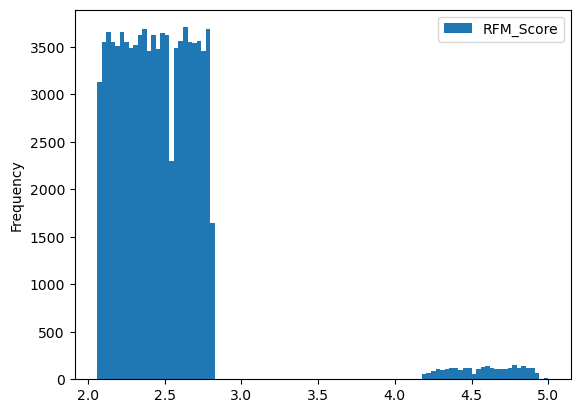

In [9]:
#df['RFM_Score'] = 0.15*df['Recency_norm']+0.28 *  df['Frequency_norm']+0.57*df['Monetary_norm']

df['RFM_Score'] = 0.15*df['R_rank_norm']+0.28 * df['F_rank_norm']+0.57*df['M_rank_norm']

df['RFM_Score'] *= 0.05
df = df.round(2)
df[['RFM_Score']].plot(kind='hist',bins=100)

#### <font color='blue'> Évaluation du client basée sur le score RFM</font></br>

In [10]:
df["Customer_segment"] = np.where(df['RFM_Score'] >
                                      4.5, "Top Customers",
                                      (np.where(
                                        df['RFM_Score'] > 4,
                                        "High value Customer",
                                        (np.where(
    df['RFM_Score'] > 3,
                             "Medium Value Customer",
                             np.where(df['RFM_Score'] > 1.6,
                            'Low Value Customers', 'Lost Customers'))))))
df[[ 'RFM_Score', 'Customer_segment']].head(7)

,RFM_Score,Customer_segment
customer_unique_id,,
0000366f3b9a7992bf8c76cfdf3221e2,2.63,Low Value Customers
0000b849f77a49e4a4ce2b2a4ca5be3f,2.62,Low Value Customers
0000f46a3911fa3c0805444483337064,2.09,Low Value Customers
0000f6ccb0745a6a4b88665a16c9f078,2.27,Low Value Customers
0004aac84e0df4da2b147fca70cf8255,2.31,Low Value Customers
0004bd2a26a76fe21f786e4fbd80607f,2.56,Low Value Customers
00050ab1314c0e55a6ca13cf7181fecf,2.59,Low Value Customers


Low Value Customers    89282
Top Customers           1742
High value Customer     1110
Name: Customer_segment, dtype: int64


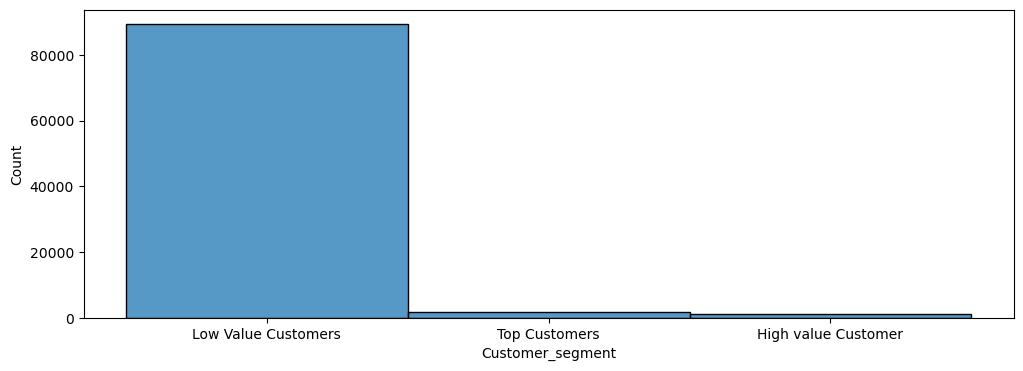

In [11]:
fig,axe = plt.subplots(figsize=(12,4))
print(df.Customer_segment.value_counts())
sns.histplot(data = df,x = 'Customer_segment',ax=axe);

### <a name="C32"><font color='teal'>3.2 CAH</font></a>

Wall time: 9.31 s


Text(0.5, 1.0, 'average link')

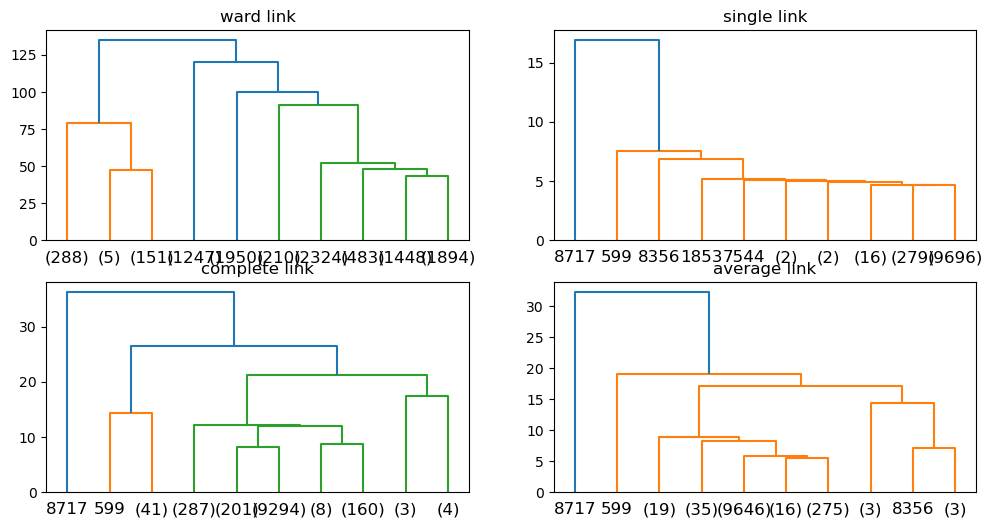

In [20]:
%%time

fig = plt.figure(figsize=(12,6))

Xtest = X_norm[np.random.randint(X_norm.shape[0],size=10000),:]
ax = fig.add_subplot(221)
Z = linkage(Xtest,method='ward')
_ = dendrogram(Z,p=10,truncate_mode='lastp',ax=ax)
ax.set_title('ward link')

ax = fig.add_subplot(222)
Z = linkage(Xtest,method='single')
_ = dendrogram(Z,p=10,truncate_mode='lastp',ax=ax)
ax.set_title('single link')

ax = fig.add_subplot(223)
Z = linkage(Xtest,method='complete')
_ = dendrogram(Z,p=10,truncate_mode='lastp',ax=ax)
ax.set_title('complete link')

ax = fig.add_subplot(224)
Z = linkage(Xtest,method='average')
_ = dendrogram(Z,p=10,truncate_mode='lastp',ax=ax)
ax.set_title('average link')


plusieurs choix seront testés.</br>
k = 2, 3 ou 6

Wall time: 7.85 s


Text(0.5, 1.0, 'Indice de Davies Bouldin \nMinimum atteint à k=5')

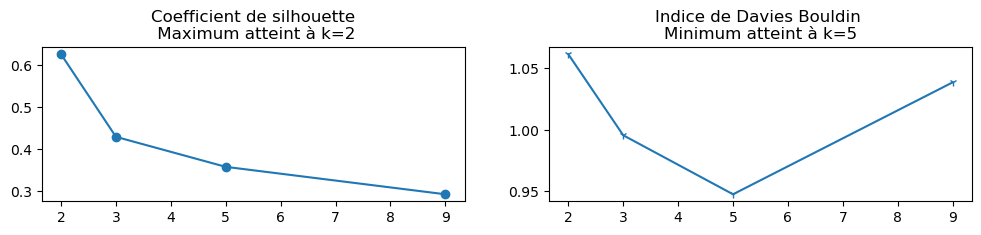

In [21]:
%%time
warnings.filterwarnings("ignore")

silhouette = []
DaviesBouldin = []
N_CLUSTER_TESTER = [2,3,5,9]

Z = linkage(Xtest,method='ward')

# Selection du nombre de cluster K optimal
# 1
for k in N_CLUSTER_TESTER:
    clustersCAH = fcluster(Z, k, criterion='maxclust')
    slh = silhouette_score(Xtest, clustersCAH, metric='euclidean')
    dbi = davies_bouldin_score(Xtest, clustersCAH)
    
    silhouette.append(slh)
    DaviesBouldin.append(dbi)

fig = plt.figure(figsize=(12,2))

ax = fig.add_subplot(121)
ax.plot(N_CLUSTER_TESTER, silhouette,marker='o')
ax.set_title('Coefficient de silhouette\n Maximum atteint à k='+str(N_CLUSTER_TESTER[np.argmax(silhouette)]))


ax = fig.add_subplot(122)
ax.plot(N_CLUSTER_TESTER, DaviesBouldin,marker='1')
ax.set_title('Indice de Davies Bouldin \nMinimum atteint à k='+str( N_CLUSTER_TESTER[np.argmin(DaviesBouldin)] ));

#Meilleur regroupement score silhouette max et Indice DB min
# Meilleur se situe au niveau du coude de l'ébolie d'inertie
# best k = 4

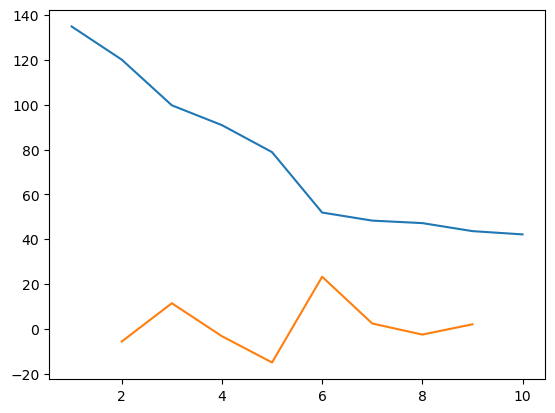

Best number of clusters: 6


In [22]:
Z = linkage(Xtest,method='ward')
last = Z[-10:, 2]
last_rev = last[::-1]
idxs = np.arange(1, len(last) + 1)
plt.plot(idxs, last_rev)

acceleration = np.diff(last, 2)  # 2nd derivative of the distances
acceleration_rev = acceleration[::-1]
plt.plot(idxs[:-2] + 1, acceleration_rev)
plt.show()
k = acceleration_rev.argmax() + 2  # if idx 0 is the max of this we want 2 clusters
print("Best number of clusters:", k)

Le pourcentage d'inertie expliqué par les 2 premiers axes est  0.5179565852511249

 [1.34494083 0.9982687  0.95816957 0.72800161 0.49456898]


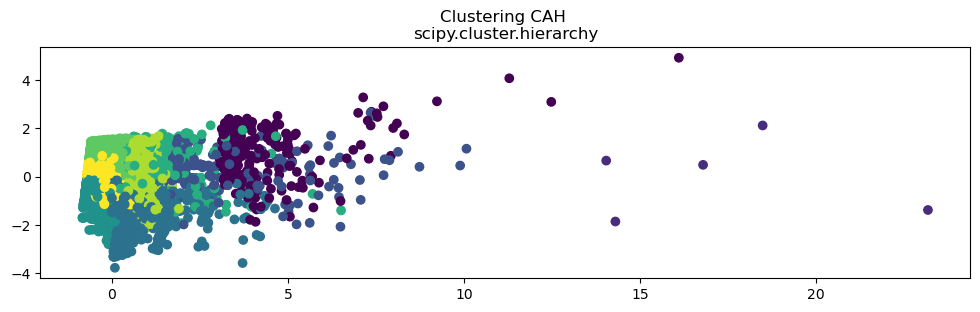

In [24]:
from sklearn.decomposition import PCA
pcav = PCA()
pcav.fit(Xtest)
print("Le pourcentage d'inertie expliqué par les 2 premiers axes est ", pcav.explained_variance_ratio_.cumsum()[1])
print('\n',pcav.explained_variance_)
X_projtest=pcav.transform(Xtest)


fig = plt.figure(figsize=(12,3))

ax = fig.add_subplot(111)
plt.scatter(X_projtest[:,0],X_projtest[:,1],c=clustersCAH)
ax.set_title('Clustering CAH \nscipy.cluster.hierarchy');

### Description Clustering

In [ ]:
DF_result_clust = df.copy()
DF_result_clust = DF_result_clust.dropna()
DF_result_clust['ResultCAHward'] = clustersCAH = fcluster(Z, 3, criterion='maxclust')

In [ ]:
pd.set_option('display.max_rows', None)
DF_result_clust.groupby(['ResultCAHward']).mean().T\
.style.background_gradient(cmap = sns.color_palette("blend:red,green", as_cmap=True),
                           axis=1)

In [ ]:
fig = plt.figure(figsize=(12,3))

ax = fig.add_subplot(111)
plt.scatter(X_proj[:,0],X_proj[:,1],c=clustersCAH)
ax.set_title('Clustering CAH \nscipy.cluster.hierarchy');

In [ ]:
%%time
cah = AgglomerativeClustering(n_clusters=3,linkage='ward')
cah.fit(X=X_norm)
cah_labels = cah.labels_

fig = plt.figure(figsize=(12,3))

ax = fig.add_subplot(111)
plt.scatter(X_proj[:,0],X_proj[:,1],c=cah_labels)
ax.set_title('Clustering CAH');


Idem

In [ ]:
pd.Series(cah_labels).value_counts().plot(kind='bar')

### <a name="C33"><font color='teal'>3.3 KMeans</font></a>

#### <a name="C331"><font color='teal'>3.3.1 Selection du nombre de cluster K optimal</font></a>

##### <a name="C311"><font color='teal'>Coefficient de silhouette et DB Index</font></a>

In [ ]:
import matplotlib as mpl 
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer

#mpl.rcParams["figure.figsize"] = (9,6)

# Instantiate the clustering model and visualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(2,20))

visualizer.fit(X_norm)    # Fit the data to the visualizer
visualizer.poof() ;   # Draw/show/poof the data

In [ ]:
# Instantiate the clustering model and visualizer 
model = KMeans()
visualizer = KElbowVisualizer(model, k=(2,20), metric='calinski_harabasz', timings=False)

visualizer.fit(X_norm)    # Fit the data to the visualizer
visualizer.poof();    # Draw/show/poof the data

In [ ]:
# Instantiate the clustering model and visualizer 

fig = plt.figure()

## 6 groupes
model = KMeans(n_clusters=6)
visualizer = SilhouetteVisualizer(model)
visualizer.fit(X_norm)    # Fit the data to the visualizer

ax2 = fig.add_subplot(121)
ax2 = visualizer.poof()    # Draw/show/poof the data


<div class="alert alert-warning">Le meilleur nombre de cluster est selon:</br>
    - Le coefficient de silhouette 2 </br>
    - La courbe de l'inertie intraclasse 6</br>
    - l'indice de Davies Bouldin 2</br>
   Conserver 2groupes
    </div>

##### <a name="C311"><font color='teal'>Stabilité du clustering</font></a>

In [ ]:
%%time

import warnings
warnings.filterwarnings("ignore")

N_CLUSTER_TESTER = range(2,10)

# Selection du nombre de cluster K optimal
fig, ax = plt.subplots(1,3, figsize=(12, 2) )

for lll in range(4):
    silhouette = []
    inertie = []
    DaviesBouldin = []
    for k in N_CLUSTER_TESTER:
        #cls = MiniBatchKMeans(n_clusters=k,init = 'k-means++',batch_size=2048)
        cls = KMeans(n_clusters=k,init = 'k-means++')
        cls.fit(X_norm)
        slh = silhouette_score(X_norm, cls.labels_, metric='euclidean')
        dbi = davies_bouldin_score(X_norm, cls.labels_)

        silhouette.append(slh)
        DaviesBouldin.append(dbi)
        inertie.append(cls.inertia_)

    #fig = plt.figure(figsize=(12,2))

    #ax = fig.add_subplot(131)
    ax[0].plot(N_CLUSTER_TESTER, silhouette,marker='o', label = str(N_CLUSTER_TESTER[np.argmax(silhouette)]) )

    #ax = fig.add_subplot(132)
    ax[1].plot(N_CLUSTER_TESTER, inertie,marker='1', label = str(lll))
    
    #ax = fig.add_subplot(133)
    ax[2].plot(N_CLUSTER_TESTER, DaviesBouldin,marker='1', label = str( N_CLUSTER_TESTER[np.argmin(DaviesBouldin)] ) )

    
ax[0].legend()  
ax[1].legend()
ax[2].legend() 

ax[0].set_title('Coefficient de silhouette')
ax[1].set_title('Inertie Intraclasse')
ax[2].set_title('Indice de Davies Bouldin');    

#ax[0].set_title('Coefficient de silhouette\n Maximum atteint à k='+str(N_CLUSTER_TESTER[np.argmax(silhouette)]))
#ax[1].set_title('Inertie Intraclasse')
#ax[2].set_title('Indice de Davies Bouldin \nMinimum atteint à k='+str( N_CLUSTER_TESTER[np.argmin(DaviesBouldin)] ));

#Meilleur regroupement score silhouette max et Indice DB min
# Meilleur se situe au niveau du coude de l'ébolie d'inertie
# best k = 4

In [ ]:
%%time

import warnings
warnings.filterwarnings("ignore")


# Selection du nombre de cluster K optimal en fonction de la stabilité
fig, ax = plt.subplots(4,2, figsize=(20, 10) )

for lll in range(4):
    ARI = []
    AMI = []
    cc = []
    for k in N_CLUSTER_TESTER:
        cc = []
        for l in range(2):
            cls = KMeans(n_clusters=k, init = 'k-means++')
            cls.fit(X_norm)
            cc.append(cls.labels_)
        ari = adjusted_rand_score(cc[0], cc[1])
        ami = adjusted_mutual_info_score(cc[0], cc[1])

        ARI.append(ari)
        AMI.append(ami)

    #fig = plt.figure(figsize=(12,3))

    #ax = fig.add_subplot(121)
    ax[lll][0].plot(N_CLUSTER_TESTER, ARI,marker='o')
    ax[lll][0].set_title('Adjusted Rand Score\n Stabilité atteinte à k='+str( N_CLUSTER_TESTER[np.argmax(ARI)] ) )

    #ax = fig.add_subplot(122)
    ax[lll][1].plot(N_CLUSTER_TESTER, AMI,marker='1')
    ax[lll][1].set_title('Adjusted Mutual Info Score\n Stabilité atteinte à k='+str( N_CLUSTER_TESTER[np.argmax(AMI)] ) );

### Stable si Indice égale 1 dc k=2 ou k=4 sont conservés

<div class="alert alert-info">Les groupes sont plus stable pour k = 2.</div>

##### <a name="C311"><font color='teal'>Visualisation </font></a>

In [ ]:
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(X_norm)
print("Le pourcentage d'inertie expliqué par les 2 premiers axes est ", pca.explained_variance_ratio_.cumsum()[1])
print('\n',pca.explained_variance_)
X_proj=pca.transform(X_norm)

In [ ]:
fig, axs = plt.subplots(1, 1, figsize=(13, 3), constrained_layout=True)

#plt.style.use('ggplot')

km = KMeans(n_clusters=2,init='k-means++')
km.fit(X=X_norm)
labels = km.labels_

axs.scatter(X_proj[:,0],X_proj[:,1],c=labels)
axs.set_title( 'Clustering KMeans k = 6\n Coeff. Silhouette:' + str(silhouette_score(X_norm, labels, metric='euclidean'))+ '\nCoeff. Davies Bouldin :'+str(davies_bouldin_score(X_norm, labels)) )
;


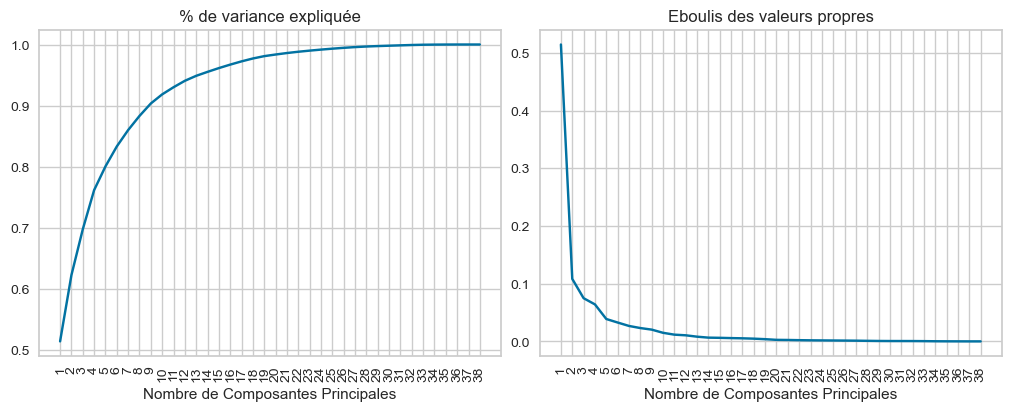

In [16]:
# Le nombre de dimension à conserver pour pour conserver P pourcent de variance du dataset d'origine
#P = 0.9
scree = pca.explained_variance_ratio_

# ou directement
# pca = PCA(n_components = P)

fig, axs = plt.subplots(1, 2, figsize=(10, 4), constrained_layout=True)

sns.lineplot(x=range(len(scree)),y=np.sort(np.cumsum(scree)),ax=axs[0])
axs[0].set_title("% de variance expliquée")
axs[0].set_xlabel("Nombre de Composantes Principales")
axs[0].set_xticks([i for i in range(len(scree))],labels = [str(i+1) for i in range(len(scree))])
axs[0].tick_params(axis='x', rotation=90)
#axs[0].set_ylim(0,1)

sns.lineplot(x=range(len(scree)),y=scree,ax=axs[1],markers='b')
axs[1].set_title("Eboulis des valeurs propres")
axs[1].set_xlabel("Nombre de Composantes Principales")
axs[1].set_xticks([i for i in range(len(scree))],labels = [str(i+1) for i in range(len(scree))])
#axs[1].set_ylim(0,1)
axs[1].tick_params(axis='x', rotation=90)
#plt.xticks(x, labels, rotation ='vertical')

plt.show()

In [17]:
pca.explained_variance_ratio_.cumsum()

array([0.51462702, 0.62297203, 0.69781744, 0.76191759, 0.8007023 ,
       0.83339272, 0.86014233, 0.88323541, 0.90362433, 0.91849826,
       0.93015033, 0.94068504, 0.94882663, 0.95530434, 0.96146323,
       0.96715184, 0.97246061, 0.97717403, 0.98100035, 0.98364678,
       0.98607601, 0.98816538, 0.98999995, 0.99168061, 0.99320024,
       0.99457069, 0.99577915, 0.99672901, 0.99744309, 0.99805128,
       0.99863835, 0.99919929, 0.99962595, 0.99983354, 0.99994342,
       1.        , 1.        , 1.        ])

In [18]:
#d = np.argmax(np.cumsum(scree) >= P) + 1
d = 6#80%
print("Le nombre de composant comsorvé est : {} avec {:.2%}".format(d,pca.explained_variance_ratio_.cumsum()[d-1]))

Le nombre de composant comsorvé est : 6 avec 83.34%


In [19]:
pca = PCA(n_components = d)
X_proj=pca.fit_transform(X_norm)

''

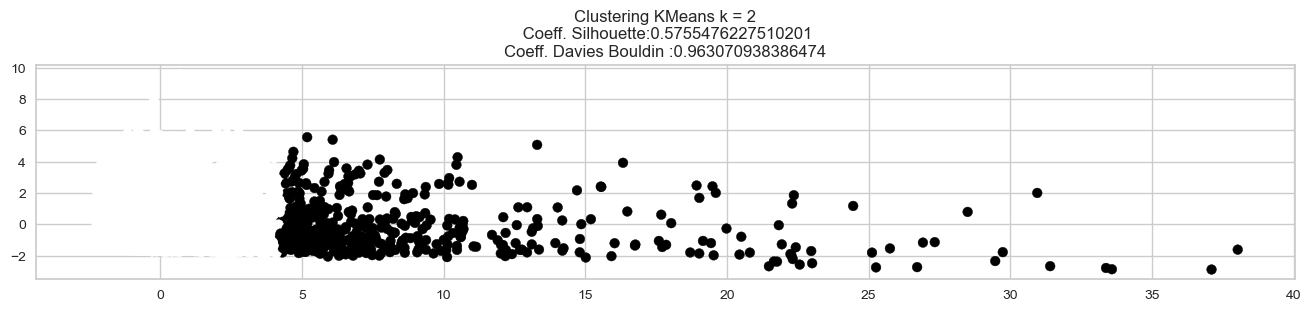

In [86]:
fig, axs = plt.subplots(1, 1, figsize=(13, 3), constrained_layout=True)

km = KMeans(n_clusters=2,init='k-means++')
km.fit(X=X_proj)
labels = km.labels_


axs.scatter(X_proj[:,0],X_proj[:,1],c=labels)
axs.set_title('Clustering KMeans k = 2\n Coeff. Silhouette:' + str(silhouette_score(X_norm, labels, metric='euclidean'))+ '\nCoeff. Davies Bouldin :'+str(davies_bouldin_score(X_norm, labels)) )

;


<AxesSubplot:>

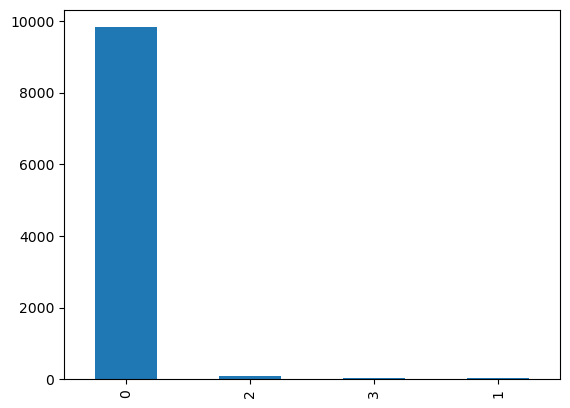

In [65]:
pd.Series(labels).value_counts().plot(kind='bar')

##### RadViz

In [26]:
from yellowbrick.features.rankd import Rank2D
from yellowbrick.features.radviz import RadViz
from yellowbrick.features.pcoords import ParallelCoordinates

In [34]:
y

customer_unique_id
3dde25397997c85f87f7737ebf570966    4.0
4d5e4a9d09fe7108d3022c3c3f93100b    1.0
0741fe7ca466a771cea561293fc17b5a    4.0
e7cc3ff52a58ea9aacc1e0179930018e    1.0
7d8878e30e938c07ab1b24f68eb0e14b    5.0
                                   ... 
e7b9bd81343df9f721e62234199d871d    5.0
61d7a4bde52b7f2a62ea927a8bb2a03a    3.0
6a4eba155591e1b2753e57390b62ceb3    4.0
915a1e89d92c0795ec4cd266729d4328    5.0
73a16d227b8890311f474d135afa3980    5.0
Name: LastMeanScore_Mean, Length: 10000, dtype: float64

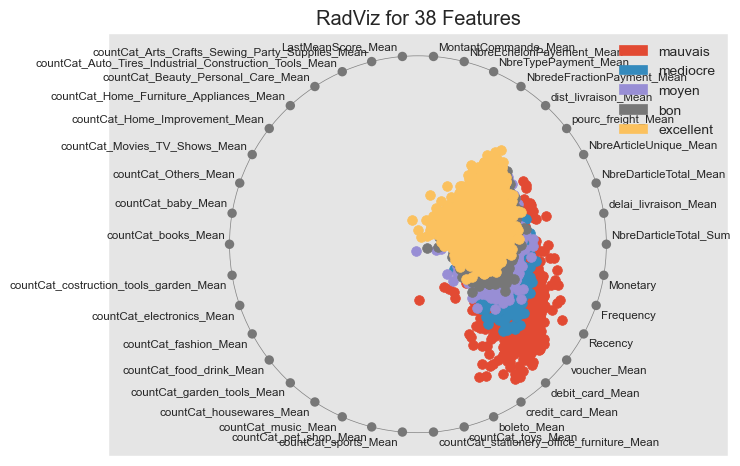

<AxesSubplot:title={'center':'RadViz for 38 Features'}>

In [37]:
classe = ["mauvais" ,'mediocre','moyen','bon','excellent'] 
X = df.copy()
y =  np.round(df.LastMeanScore_Mean).astype('int')

visualizer = RadViz(classes=classe, features=X.columns )


visualizer.fit(X.values,y)      # Fit the data to the visualizer
visualizer.transform(X.values)   # Transform the data
visualizer.poof()

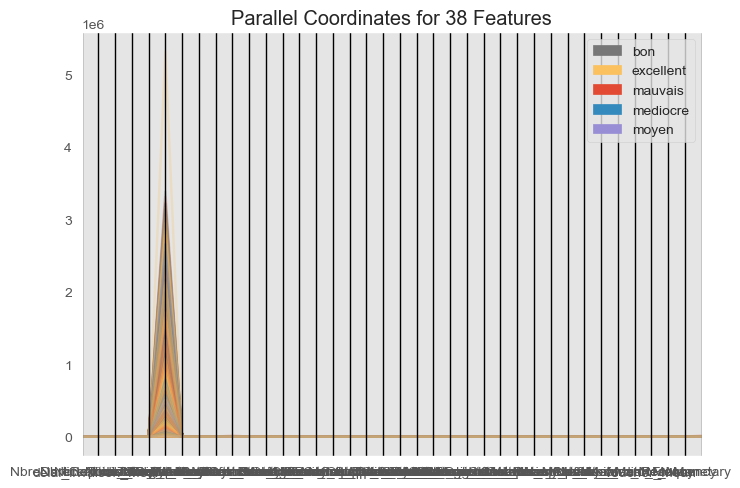

<AxesSubplot:title={'center':'Parallel Coordinates for 38 Features'}>

In [39]:
# Instantiate the visualizer
visualizer = ParallelCoordinates(classes=classe, features=X.columns)

visualizer.fit(X, y)      # Fit the data to the visualizer
visualizer.transform(X)   # Transform the data
visualizer.poof()         # Draw/show/poof the data

#### Intercluster Distance

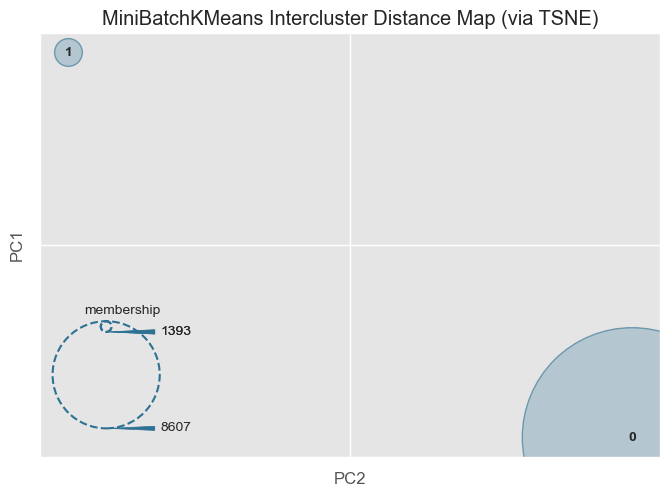

Wall time: 363 ms


In [40]:
%%time
from yellowbrick.cluster import intercluster_distance
from sklearn.cluster import MiniBatchKMeans
visualizer = intercluster_distance(estimator=MiniBatchKMeans(2, random_state=777,batch_size=2048),
                                   embedding='tsne', X=X)

### Silhouette Scores

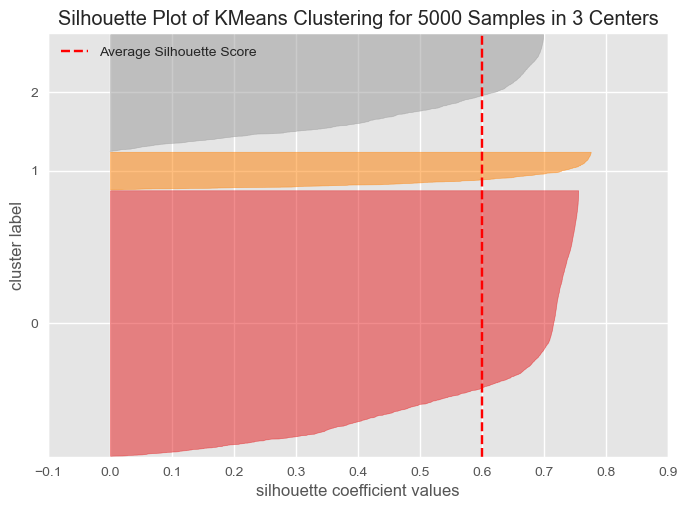

In [41]:
from yellowbrick.cluster import silhouette_visualizer
from sklearn.cluster import KMeans

visualizer = silhouette_visualizer(KMeans(3, random_state=42), X.sample(5000))

TypeError: '<=' not supported between instances of 'str' and 'int'

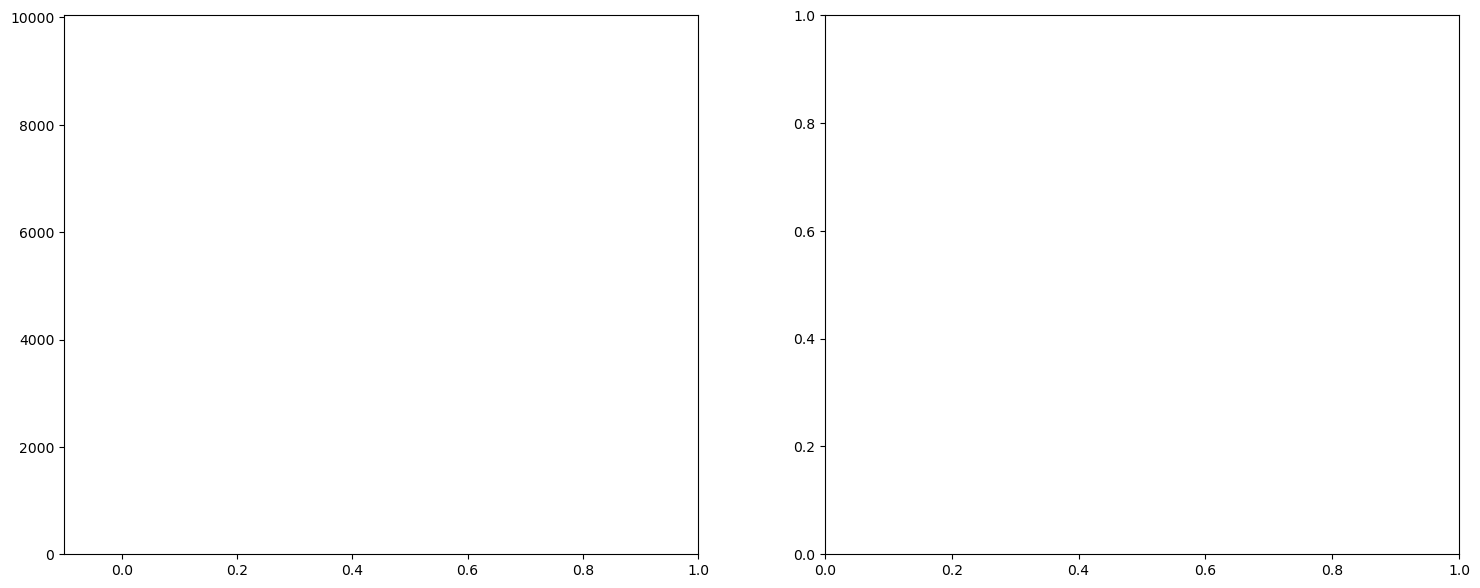

In [17]:
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm

range_n_clusters = [3, 4, 5, 6]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X_norm) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, n_init="k-means++", random_state=10)
    cluster_labels = clusterer.fit(X_norm)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X_norm, cluster_labels)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X_norm, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(
        X_proj[:, 0], X_proj[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
    )

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(
        centers[:, 0],
        centers[:, 1],
        marker="o",
        c="white",
        alpha=1,
        s=200,
        edgecolor="k",
    )

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(
        "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
        % n_clusters,
        fontsize=14,
        fontweight="bold",
    )

plt.show()

MemoryError: Unable to allocate 33.1 GiB for an array with shape (4446575056,) and data type float64

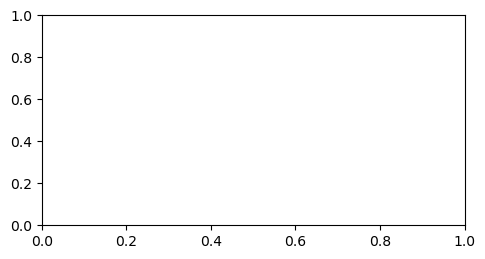

MemoryError: Unable to allocate 33.1 GiB for an array with shape (4446575056,) and data type float64

### <a name="C34"><font color='teal'>3.4 DBSCAN</font></a>

### Find MinPts et ε

How to determine MinPts</br>
set D = X_norm.shape[1] </br>
- MinPts ⩾ D + 1</br>
- MinPts = 2 * 38 </br>


In [23]:
X_norm.shape[1]

4

How to determine ε (Epsilon)

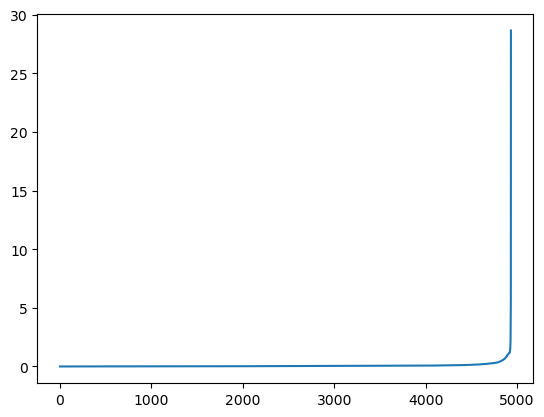

In [24]:
from sklearn.neighbors import NearestNeighbors
from matplotlib import pyplot as plt

neighbors = NearestNeighbors(n_neighbors=X_norm.shape[1] * 2)
neighbors_fit = neighbors.fit(X_norm)
distances, indices = neighbors_fit.kneighbors(X_norm)

distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances);

Zoom sur le coude

best epsilon: 1.1


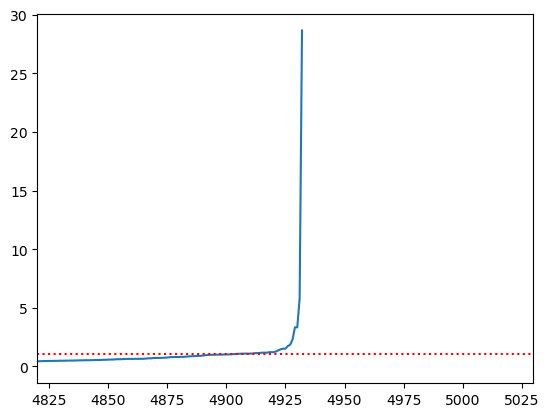

In [25]:
ax = plt.subplot(111)
ax.set_xlim(4820,5030)

best_k = 4910

ax.plot(distances)
# only one line may be specified; full height
plt.axhline(y = distances[best_k], color = 'red', ls=':',label = 'axvline - full height');
print('best epsilon:',round(distances[best_k],2))

BEst epsion trouvé à 2.84

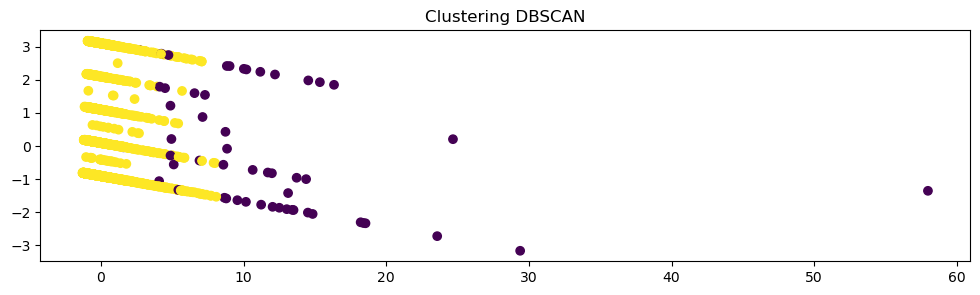

In [26]:
dbscan = DBSCAN(eps=round(distances[best_k],2), metric='euclidean',min_samples=2 * X_norm.shape[1])
dbscan.fit(X_norm)
dbscan_labels = dbscan.labels_


fig = plt.figure(figsize=(12,3))

ax = fig.add_subplot(111)
plt.scatter(X_proj[:,0],X_proj[:,1],c=dbscan_labels)
ax.set_title('Clustering DBSCAN');

DBSCAN a créé un groupe unique et à detrecter un ensemble d'outliers

### Description Clustering

In [27]:
pd.set_option('display.max_rows', None)

DF_result_clust['ResDBscan'] = dbscan.labels_
DF_result_clust.groupby(['ResDBscan']).mean().T\
.style.background_gradient(cmap = sns.color_palette("blend:red,green", as_cmap=True),
                           axis=1)

ResDBscan,-1,0
LastMeanScore_Mean,3.353774,4.102254
Recency,256.924528,241.780943
Frequency,1.377358,1.030738
Monetary,1601.629057,150.270545
ResultCAHward,1.018868,1.954303


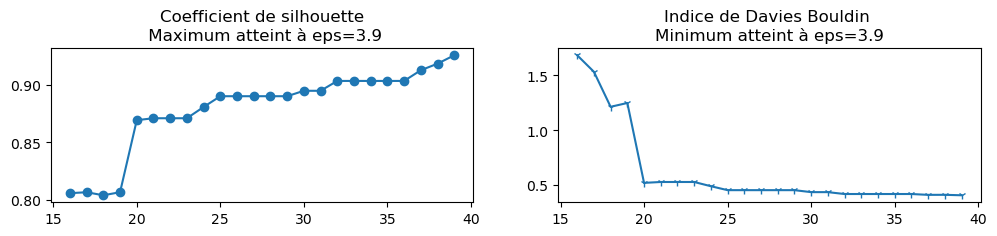

In [28]:
import warnings
warnings.filterwarnings("ignore")

silhouette = []
inertie = []
DaviesBouldin = []
EPS_TESTER = range(16,40)

# Selection du nombre de cluster K optimal
# 1
for k in EPS_TESTER:
    dbscan = DBSCAN(eps=k/10, metric='euclidean',min_samples=X_norm.shape[1]*2)
    dbscan.fit(X_norm)
    slh = silhouette_score(X_norm, dbscan.labels_, metric='euclidean')
    dbi = davies_bouldin_score(X_norm, dbscan.labels_)
    
    silhouette.append(slh)
    DaviesBouldin.append(dbi)
    

fig = plt.figure(figsize=(12,2))

ax = fig.add_subplot(121)
ax.plot(EPS_TESTER, silhouette,marker='o')
ax.set_title('Coefficient de silhouette\n Maximum atteint à eps='+str(EPS_TESTER[np.argmax(silhouette)]/10))

ax = fig.add_subplot(122)
ax.plot(EPS_TESTER, DaviesBouldin,marker='1')
ax.set_title('Indice de Davies Bouldin \nMinimum atteint à eps='+str( EPS_TESTER[np.argmin(DaviesBouldin)]/10 ));


#Meilleur regroupement score silhouette max et Indice DB min
# Meilleur se situe au niveau du coude de l'ébolie d'inertie
# best k = 4

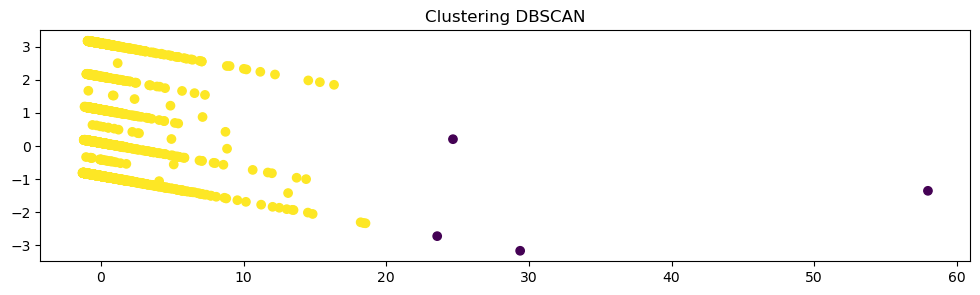

In [29]:
dbscan = DBSCAN(eps=3.9, metric='euclidean',min_samples=2 * X_norm.shape[1])
dbscan.fit(X_norm)
dbscan_labels = dbscan.labels_


fig = plt.figure(figsize=(12,3))

ax = fig.add_subplot(111)
plt.scatter(X_proj[:,0],X_proj[:,1],c=dbscan_labels)
ax.set_title('Clustering DBSCAN');

In [30]:
pd.set_option('display.max_rows', None)

DF_result_clust['ResDBscan2'] = dbscan.labels_
DF_result_clust.groupby(['ResDBscan2']).mean().T\
.style.background_gradient(cmap = sns.color_palette("blend:red,blue", as_cmap=True),
                           axis=1)

ResDBscan2,-1,0
LastMeanScore_Mean,3.250000,4.094898
Recency,129.500000,242.034896
Frequency,1.000000,1.034490
Monetary,4332.037500,162.482948
ResultCAHward,1.000000,1.945019
ResDBscan,-1.000000,-0.009941


## IV) PCA à Noyau

In [ ]:
from sklearn.decomposition import KernelPCA
rbf_pca = KernelPCA(n_components = 2, kernel="rbf", gamma= 0.001001)
X_reduced_rbf = rbf_pca.fit_transform(X)

In [ ]:
# afficher chaque observation
plt.scatter(X_reduced_rbf[:, 0], X_reduced_rbf[:, 1],c=yy)
# colorer en utilisant la variable 'Rank'
plt.title('Kernel PCA')
plt.colorbar();

## Define algorithms for the manifold learning

In [21]:
N_NEIGHBORS = 12  # neighborhood which is used to recover the locally linear structure
N_COMPONENTS = 2  # number of coordinates for the manifold

## V) MDS (MultiDimensional Scaling)

CPU times: total: 21min 55s
Wall time: 19min 26s


<AxesSubplot:>

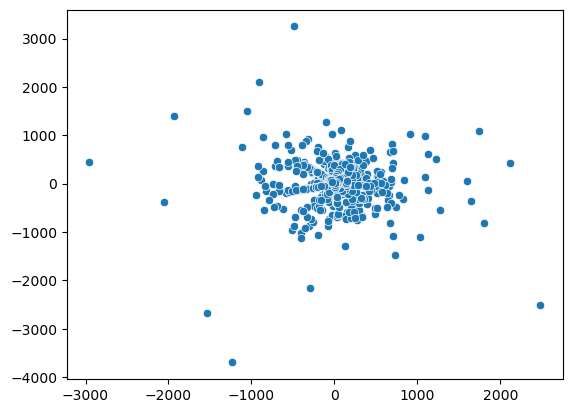

In [22]:
%%time
from sklearn.manifold import MDS
mds = MDS(n_components = N_COMPONENTS)
X_reduced_mds = mds.fit_transform(X_norm)

# afficher chaque observation
sns.scatterplot(X_reduced_mds[:, 0], X_reduced_mds[:, 1])

In [ ]:
import warnings
warnings.filterwarnings("ignore")
fig, axs = plt.subplots(1, 2, figsize=(10, 4), constrained_layout=True)

for i,m in enumerate([True,False]):
    mds = MDS(n_components = N_COMPONENTS, metric=m)
    X_reduced_mds = mds.fit_transform(X_norm)

    # afficher chaque observation
    sns.scatterplot(X_reduced_mds[:, 0], X_reduced_mds[:, 1], ax=axs[i]) #,c=yy
    # colorer en utilisant la variable 'Rank'
    if m:
        axs[i].set_title('perform metric MDS Stress {}'.format(round(mds.stress_,2)),fontsize = 6)
    else:
        axs[i].set_title('perform nonmetric MDS Stress {}'.format(round(mds.stress_,2)),fontsize = 6);

## VI) Isomap (Isometric Mapping)

CPU times: total: 8.28 s
Wall time: 18.2 s


<AxesSubplot:>

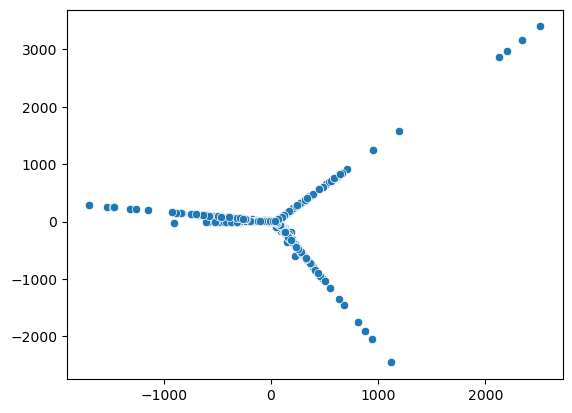

In [23]:
%%time
from sklearn.manifold import Isomap
isomap = Isomap(n_components = N_COMPONENTS,n_neighbors=N_NEIGHBORS)
X_reduced_isomap = isomap.fit_transform(X_norm)

# afficher chaque observation
sns.scatterplot(X_reduced_isomap[:, 0], X_reduced_isomap[:, 1])

CPU times: total: 5min 15s
Wall time: 5min 16s


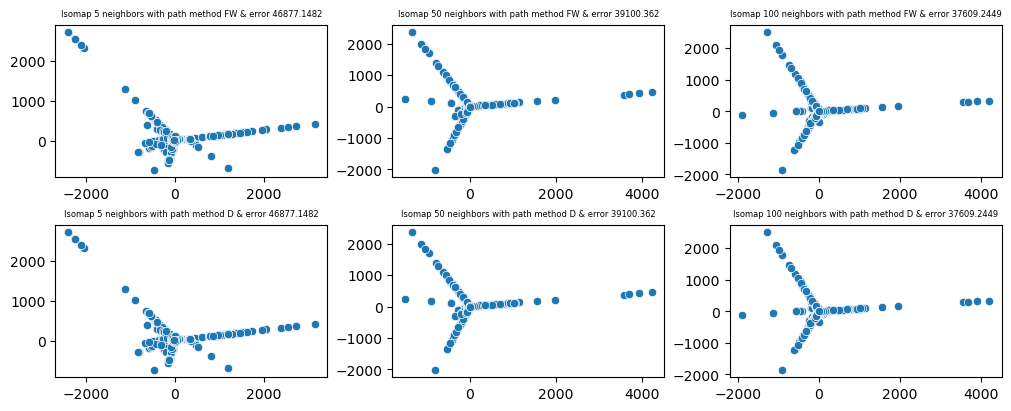

In [35]:
%%time
import warnings
warnings.filterwarnings("ignore")
fig, axs = plt.subplots(2, 3, figsize=(10, 4), constrained_layout=True)

for i,k in enumerate([5,50,100]):
    for j, m in enumerate(['FW','D']):
        isomap = Isomap(n_components = N_COMPONENTS, n_neighbors=k, path_method=m)
        X_reduced_isomap = isomap.fit_transform(X_norm)

        # afficher chaque observation
        sns.scatterplot(X_reduced_isomap[:, 0], X_reduced_isomap[:, 1],ax=axs[j,i]) #,c=yy
        # colorer en utilisant la variable 'Rank'
        axs[j,i].set_title('Isomap {} neighbors with path method {} & error {}'.format(k,m,round(isomap.reconstruction_error(),4)),fontsize = 6);

#plt.colorbar();
# plus n_neighbors grands plus on se rapproche de la visualisation de l'ACP

## VII) LLE (Local Linear Embedding)

CPU times: total: 1.75 s
Wall time: 1.23 s


<AxesSubplot:>

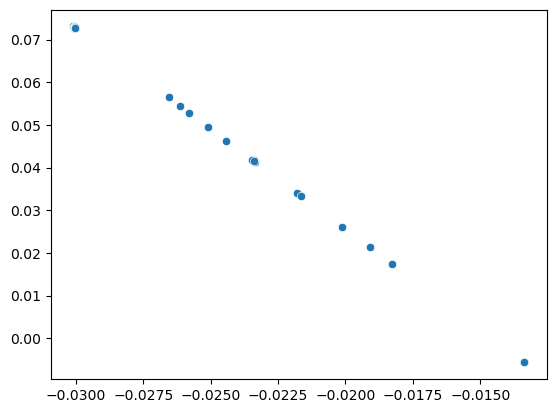

In [24]:
%%time
from sklearn.manifold import LocallyLinearEmbedding
lle = LocallyLinearEmbedding(n_components = N_COMPONENTS,n_neighbors=30)
X_reduced_lle = lle.fit_transform(X_norm)

# afficher chaque observation
sns.scatterplot(X_reduced_lle[:, 0], X_reduced_lle[:, 1])#,c=yy
# colorer en utilisant la variable 'Rank'
#plt.set_title('LLE method: {0} avec {1} neighbors errors {2:.4%}'.format(n,k,lle.reconstruction_error_),fontsize = 6);

#method{‘standard’, ‘hessian’, ‘modified’, ‘ltsa’}

CPU times: total: 10min
Wall time: 2min 57s


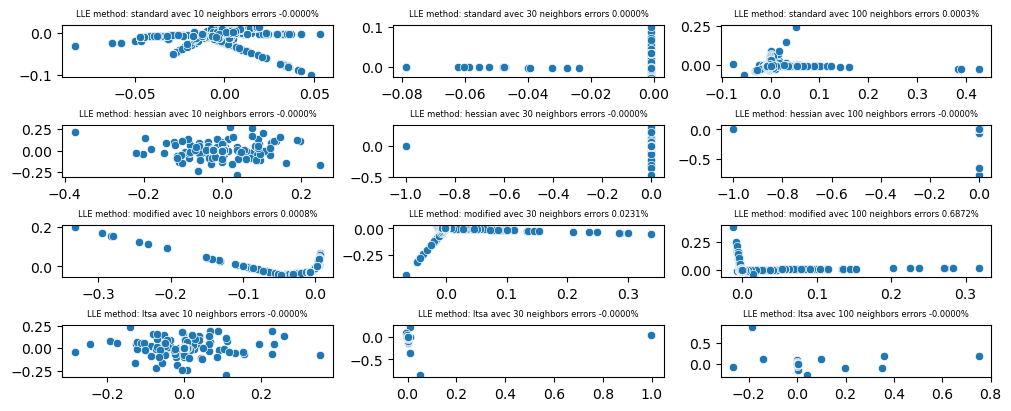

In [36]:
%%time
import warnings
warnings.filterwarnings("ignore")
fig, axs = plt.subplots(4, 3, figsize=(10, 4), constrained_layout=True)

for j,k in enumerate([10,30,100]):
    for i,n in enumerate(['standard','hessian','modified','ltsa']):
        lle = LocallyLinearEmbedding(n_components = N_COMPONENTS,n_neighbors =k,method=n,eigen_solver='dense')
        X_reduced_lle = lle.fit_transform(X_norm)

        # afficher chaque observation
        sns.scatterplot(X_reduced_lle[:, 0], X_reduced_lle[:, 1],ax=axs[i,j]) #,c=yy
        # colorer en utilisant la variable 'Rank'
        axs[i,j].set_title('LLE method: {0} avec {1} neighbors errors {2:.4%}'.format(n,k,lle.reconstruction_error_),fontsize = 6);

#plt.colorbar();
# plus n_neighbors grands plus on se rapproche de la visualisation de l'ACP

## VIII) t-SNE (t-Stochastic Neighbor Embedding)

CPU times: total: 1min 40s
Wall time: 21.4 s


<AxesSubplot:>

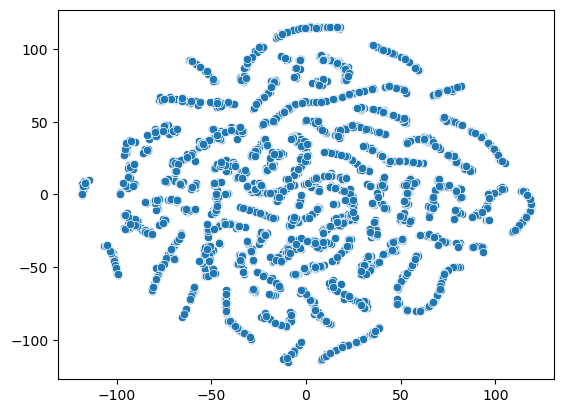

In [27]:
%%time
from sklearn.manifold import TSNE
tsne = TSNE(n_components = N_COMPONENTS,perplexity=10)
X_reduced_tsne = tsne.fit_transform(X_norm)

# afficher chaque observation
sns.scatterplot(X_reduced_tsne[:, 0], X_reduced_tsne[:, 1])#,c=yy

CPU times: total: 2min 1s
Wall time: 27 s


<AxesSubplot:>

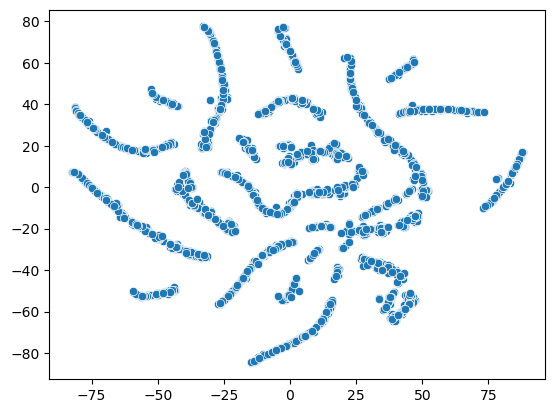

In [29]:
%%time
from sklearn.manifold import TSNE
tsne = TSNE(n_components = N_COMPONENTS,perplexity=30)
X_reduced_tsne = tsne.fit_transform(X_norm)

# afficher chaque observation
sns.scatterplot(X_reduced_tsne[:, 0], X_reduced_tsne[:, 1])#,c=yy

CPU times: total: 2h 25min
Wall time: 47min 53s


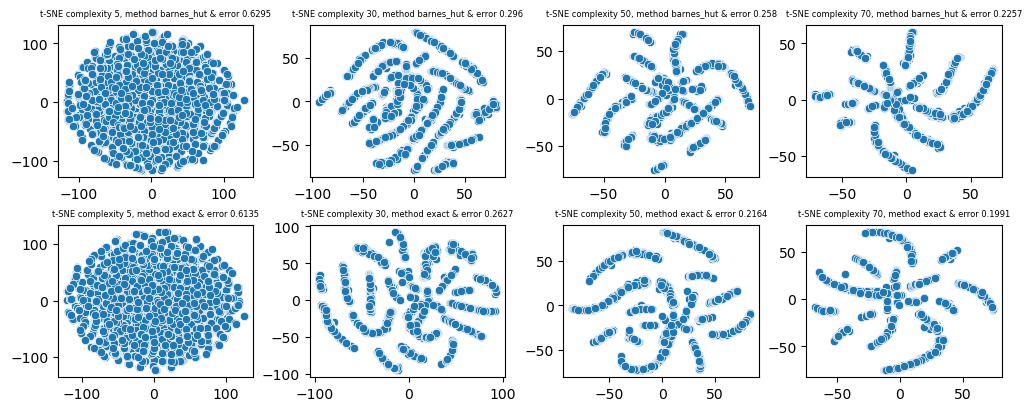

In [33]:
%%time
import warnings
warnings.filterwarnings("ignore")
fig, axs = plt.subplots(2, 4, figsize=(10, 4), constrained_layout=True)

for i,k in enumerate([5,30,50,70]):
    for j, m in enumerate(['barnes_hut','exact']):
        tsne = TSNE(n_components = N_COMPONENTS,perplexity=k,method = m)
        X_reduced_tsne = tsne.fit_transform(X_norm)
        metricsKL = tsne.kl_divergence_

        # afficher chaque observation
        sns.scatterplot(X_reduced_tsne[:, 0], X_reduced_tsne[:, 1],ax=axs[j,i])#,c=yy
        # colorer en utilisant la variable 'Rank'
        axs[j,i].set_title('t-SNE complexity {}, method {} & error {}'.format(k,m,round(metricsKL,4)),fontsize = 6);
